# Part 1

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# 1.1
# Path to the data directory (relative to the repository root)
data_path = "data"  # Since we're already in the Term-paper folder

# Get list of CSV files using os.listdir (more reliable across systems)
try:
    # Get all files in the data directory
    all_files = os.listdir(data_path)
    # Filter for CSV files
    csv_files = [f for f in all_files if f.lower().endswith(".csv")]

    if not csv_files:
        print("No CSV files found in", data_path)
        merged_df = pd.DataFrame()
    else:
        dfs = []  # list to store (filename, dataframe) pairs
        for fname in csv_files:
            full_path = os.path.join(
                data_path, fname
            )  # Use os.path.join for reliable path construction
            try:
                df = pd.read_csv(full_path, sep=";")
                dfs.append((fname, df))
                print("Loaded", fname, "->", df.shape)
            except Exception as e:
                print("Failed to read", full_path, ":", e)

        # If files were successfully read, merge them
        if dfs:
            # Start with first DataFrame
            merged_df = dfs[0][1]
            for name, df in dfs[1:]:
                # find common columns to merge on
                common = [c for c in merged_df.columns if c in df.columns]
                if common:
                    # merge on all common columns (outer join to keep data)
                    merged_df = pd.merge(merged_df, df, how="outer", on=common)
                else:
                    # no common columns: concatenate side-by-side
                    merged_df = pd.concat([merged_df, df], axis=1)

            print("Final merged shape:", merged_df.shape)
        else:
            merged_df = pd.DataFrame()
            print("No files were successfully read")

except Exception as e:
    print("Error accessing data directory:", e)
    merged_df = pd.DataFrame()

# Drop unnecessary columns
merged_df = merged_df.drop("DATE,CPI", axis=1)
display(merged_df)

Loaded SCE-Sep-2013.csv -> (1529, 29)
Loaded SCE-Nov-2022.csv -> (1184, 29)
Loaded SCE-Jan-2021.csv -> (1259, 29)
Loaded CPI.csv -> (944, 1)
Loaded SCE-Jan-2020.csv -> (1317, 29)
Loaded SCE-Nov-2023.csv -> (1098, 29)
Loaded SCE-Nov-2021.csv -> (1281, 29)
Loaded SCE-Aug-2018.csv -> (1331, 29)
Loaded SCE-Aug-2024.csv -> (1108, 29)
Loaded SCE-Jul-2013.csv -> (1197, 29)
Loaded SCE-Jan-2022.csv -> (1235, 29)
Loaded SCE-Dec-2019.csv -> (1262, 29)
Loaded SCE-Dec-2018.csv -> (1268, 29)
Loaded SCE-Dec-2024.csv -> (976, 29)
Loaded SCE-Jan-2023.csv -> (1178, 29)
Loaded SCE-Aug-2019.csv -> (1290, 29)
Loaded SCE-Nov-2020.csv -> (1233, 29)
Loaded SCE-Sep-2015.csv -> (1262, 29)
Loaded SCE-Mar-2017.csv -> (1365, 29)
Loaded SCE-Nov-2024.csv -> (1037, 29)
Loaded SCE-Nov-2018.csv -> (1323, 29)
Loaded SCE-Aug-2021.csv -> (1265, 29)
Loaded SCE-Jul-2016.csv -> (1305, 29)
Loaded SCE-Apr-2015.csv -> (1283, 29)
Loaded SCE-May-2014.csv -> (1280, 29)
Loaded SCE-Dec-2020.csv -> (1337, 29)
Loaded SCE-Dec-2021.csv 

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70000220,201306,2013-06-04,16.3,1.0,3.0,28.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
1,70000224,201306,2013-06-03,0.2,0.0,4.0,65.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
2,70000234,201306,2013-06-17,4.1,1.0,3.0,41.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN
3,70000238,201306,2013-06-13,3.0,0.0,3.0,74.0,0.0,0.0,1.0,...,10.0,1.0,1.0,0.0,5.0,1.0,NaN,NaN,NaN,NaN
4,70000238,201307,2013-07-10,1.9,0.0,3.0,74.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75025299,202412,2024-12-19,0.6,1.0,3.0,33.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,2.0,0.0,2.0,1.0
176097,75025320,202412,2024-12-05,0.8,1.0,4.0,56.0,1.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176098,75025337,202412,2024-12-21,1.0,1.0,3.0,68.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75025373,202412,2024-12-09,2.4,1.0,2.0,58.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0


In [3]:
# 1.2.1
# Compute and print the number of unique user IDs
num_nunique_id = merged_df["userid"].nunique()
print("Number of unique user IDs:", num_nunique_id)

Number of unique user IDs: 23369


In [4]:
# 1.2.2
print("Number of observations:", len(merged_df))

Number of observations: 176101


In [5]:
# 1.2.3
# Compute and print the number of unique survey waves
print(f"{len(merged_df['wid'].unique())} is the number of survey waves")

139 is the number of survey waves


In [6]:
# 1.2.4
# Convert 'date' column to datetime format
merged_df["date"] = pd.to_datetime(merged_df["date"], format="%Y-%m-%d")

# Find and print the first and last dates in the dataset
first_date = merged_df["date"].min()
last_date = merged_df["date"].max()

print("First date in dataset:", first_date)
print("Last date in dataset:", last_date)

First date in dataset: 2013-06-01 00:00:00
Last date in dataset: 2024-12-31 00:00:00


# Part 2

In [7]:
# 2.1
# Identify all numeracy-related columns automatically
num_cols = [col for col in merged_df.columns if col.startswith("num_lit_")]

# Fill missing numeracy values per individual
merged_df[num_cols] = merged_df.groupby("userid")[num_cols].transform(
    lambda x: x.ffill().bfill()
)

# Check for remaining missing values in numeracy columns
merged_df[num_cols].isna().sum()

# Count individuals with any remaining missing numeracy values
merged_df.groupby("userid")[num_cols].first().isna().sum()

num_lit_q1              66
num_lit_q1_correct      66
num_lit_q2              97
num_lit_q2_correct      97
num_lit_q3             150
num_lit_q3_correct     150
num_lit_q5             126
num_lit_q5_correct     126
num_lit_q6             218
num_lit_q6_correct     218
num_lit_q8            5384
num_lit_q8_correct    5384
num_lit_q9            5435
num_lit_q9_correct    5435
dtype: int64

In [8]:
# 2.2.1
# Remove rows with missing demographic data
merged_df = merged_df.dropna(subset=["female", "age", "educ"])
# Check for remaining missing demographic values
merged_df[["female", "age", "educ"]].isna().sum()

female    0
age       0
educ      0
dtype: int64

In [9]:
# 2.2.2
# Remove rows with missing key economic variables
before = len(merged_df)
print("Rows before drop:", before)

merged_df = merged_df.dropna(
    subset=["inflation", "house_price_change", "prob_stocks_up"]
)
after = len(merged_df)
print("Rows after drop:", after)
print("Rows dropped due to missing key variables:", before - after)

Rows before drop: 175233
Rows after drop: 173550
Rows dropped due to missing key variables: 1683


In [10]:
# 2.2.3
# Remove rows with missing numeracy data
before = len(merged_df)
print("Rows before drop:", before)

merged_df = merged_df.dropna(subset=num_cols)

after = len(merged_df)
print("Rows after drop:", after)
print("Rows dropped due to missing numeracy data:", before - after)

Rows before drop: 173550
Rows after drop: 137576
Rows dropped due to missing numeracy data: 35974


In [11]:
# 2.3.1 and #2.3.2
# Calculate and print the 0.1% and 99.9% quantiles for 'inflation'
threshhold_min = merged_df["inflation"].quantile(0.001)
threshhold_max = merged_df["inflation"].quantile(0.999)
print(threshhold_min)
print(threshhold_max)

# Remove outliers in 'inflation' based on 0.1% and 99.9% quantiles
before = len(merged_df)
print("Rows before drop:", before)

merged_df = merged_df[merged_df["inflation"].between(threshhold_min, threshhold_max)]

after = len(merged_df)
print("Rows after drop:", after)
print("Rows dropped due to outliers in inflation:", before - after)

-75.0
100.0
Rows before drop: 137576
Rows after drop: 137457
Rows dropped due to outliers in inflation: 119


In [12]:
# 2.4
# Create binary 'college' variable based on 'educ' column
iscollege = merged_df["educ"] >= 3
merged_df.loc[:, "college"] = (merged_df["educ"] >= 3).astype(int)

In [13]:
# 2.5
# Columns ending with _correct
corrects = [col for col in num_cols if col.endswith("_correct")]

# Group by user and sum the correct answers
merged_df["total_correct"] = (
    merged_df.groupby("userid")[corrects].transform("sum").sum(axis=1)
)
# Drop the 'total_correct' column as it's no longer needed
merged_df = merged_df.drop(columns=["total_correct"])
# calculate total correct answers per user and map back to DataFrame
merged_df.loc[:, "total_correct"] = merged_df["userid"].map(
    merged_df.groupby("userid")[corrects].sum().sum(axis=1)
)
# Check min value of 'num_lit_q1_correct' to ensure no negative values
merged_df["num_lit_q1_correct"].min()
# Create a list of all _correct columns
corrects = [col for col in merged_df.columns if col.endswith("_correct")]

# Ensure values are 0 or 1
merged_df[corrects] = merged_df[corrects].clip(upper=1)
# calculate total correct answers per row
merged_df["total_correct"] = merged_df[corrects].sum(axis=1)
# Group by user and pick the first total_correct per user (if multiple rows per user)
user_totals = merged_df.groupby("userid")["total_correct"].first()
print("\n Total Correct Answers per User (Sample)")
user_totals_df = user_totals.reset_index()
print(user_totals_df.head())


# Calculate frequency counts of total correct answers
counts = user_totals.value_counts().sort_index()
# Calculate percentiles
percentiles = counts / counts.sum() * 100
percentiles_df = percentiles.reset_index()
percentiles_df.columns = ["total_correct", "percentile"]
print("\n Percentiles DataFrame")
print(percentiles_df.head())


# Calculate mean of total correct answers
mean = merged_df["total_correct"].mean()
# create binary 'num_lit_high' variable based on mean
merged_df["num_lit_high"] = (merged_df["total_correct"] >= mean).astype(int)


 Total Correct Answers per User (Sample)
     userid  total_correct
0  70057317            7.0
1  70057321            8.0
2  70057352            8.0
3  70057367            8.0
4  70057373            8.0

 Percentiles DataFrame
   total_correct  percentile
0            0.0    0.141163
1            2.0    0.728402
2            3.0    2.405421
3            4.0    5.714286
4            5.0   10.519481


In [14]:
# 2.6
# Final dataset overview
num_nunique_id = merged_df["userid"].nunique()
print("Number of unique user IDs:", num_nunique_id)

print(f"{len(merged_df)} is the total number of observations")

print(f"{len(merged_df['wid'].unique())} is the number of survey waves")

first_date = merged_df["date"].min()
last_date = merged_df["date"].max()

print("First date in dataset:", first_date)
print("Last date in dataset:", last_date)

Number of unique user IDs: 17710
137457 is the total number of observations
117 is the number of survey waves
First date in dataset: 2015-04-02 00:00:00
Last date in dataset: 2024-12-31 00:00:00


# Part 3

In [ ]:
# Prep work for all 3
#  helper function 
def summarize_and_plot(
    df, group_col, mapping_dict, expectation_vars, colors, title, index_name
):

    # Groups the dataframe by a binary variable, displays means, and plots comparison bar charts.

    # Compute means
    grouped_means = df.groupby(group_col)[expectation_vars].mean().round(2)
    grouped_means.index.name = index_name
    grouped_means.index = grouped_means.index.map(mapping_dict)

    print(f"Average expectations by {index_name.lower()} in percentage:")
    display(grouped_means)

    # Create bar charts
    fig, axes = plt.subplots(1, len(expectation_vars), figsize=(18, 5))
    for i, var in enumerate(expectation_vars):
        for category in mapping_dict.values():
            axes[i].bar(
                category,
                grouped_means.loc[category, var],
                color=colors[category],
                width=0.5,
            )
        axes[i].set_title(var.replace("_", " ").title())
        axes[i].set_ylabel("Mean Value (%)")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return grouped_means

Average expectations by gender in percentage:


,inflation,house_price_change,prob_stocks_up
Gender,,,
Male,4.65,4.29,45.83
Female,7.44,6.38,38.12


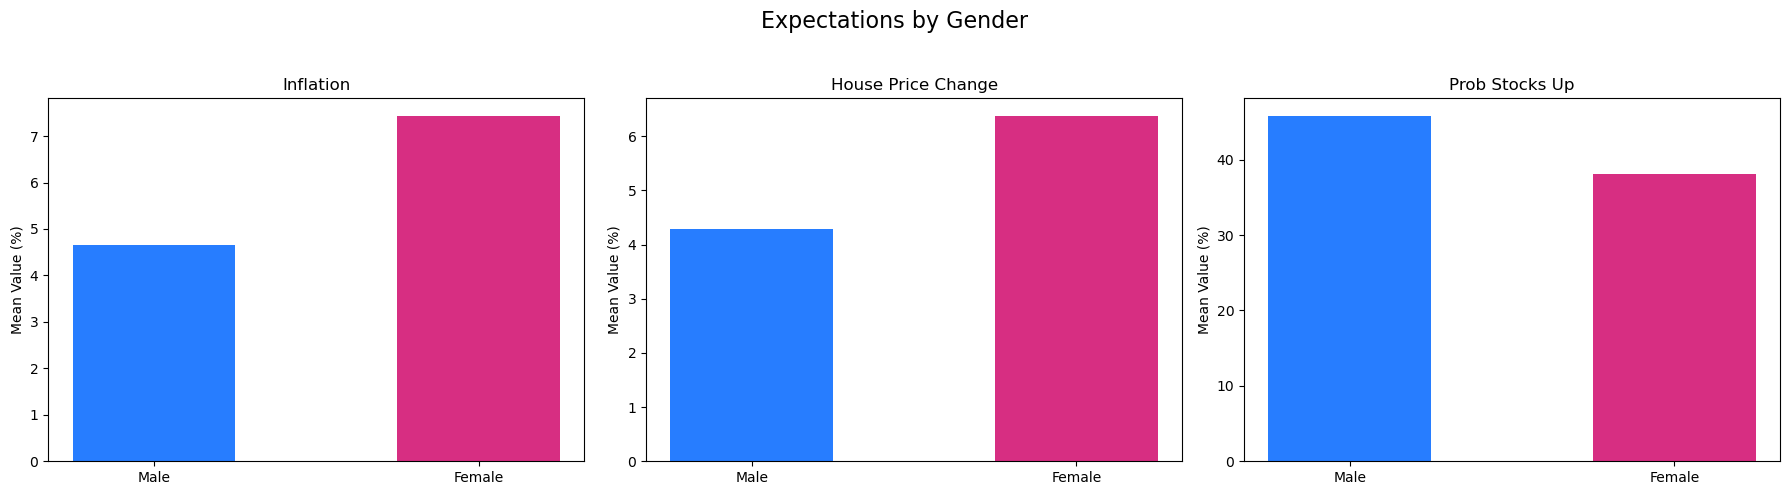

In [16]:
# 3.1.1–3.1.2
expectation_vars = ["inflation", "house_price_change", "prob_stocks_up"]

gender_means = summarize_and_plot(
    df=merged_df,
    group_col="female",
    mapping_dict={0: "Male", 1: "Female"},
    expectation_vars=expectation_vars,
    colors={"Male": "#277DFF", "Female": "#D72E82"},
    title="Expectations by Gender",
    index_name="Gender",
)

Average expectations by education in percentage:


,inflation,house_price_change,prob_stocks_up
Education,,,
Non-College,9.46,8.53,35.53
College,5.57,4.90,42.89


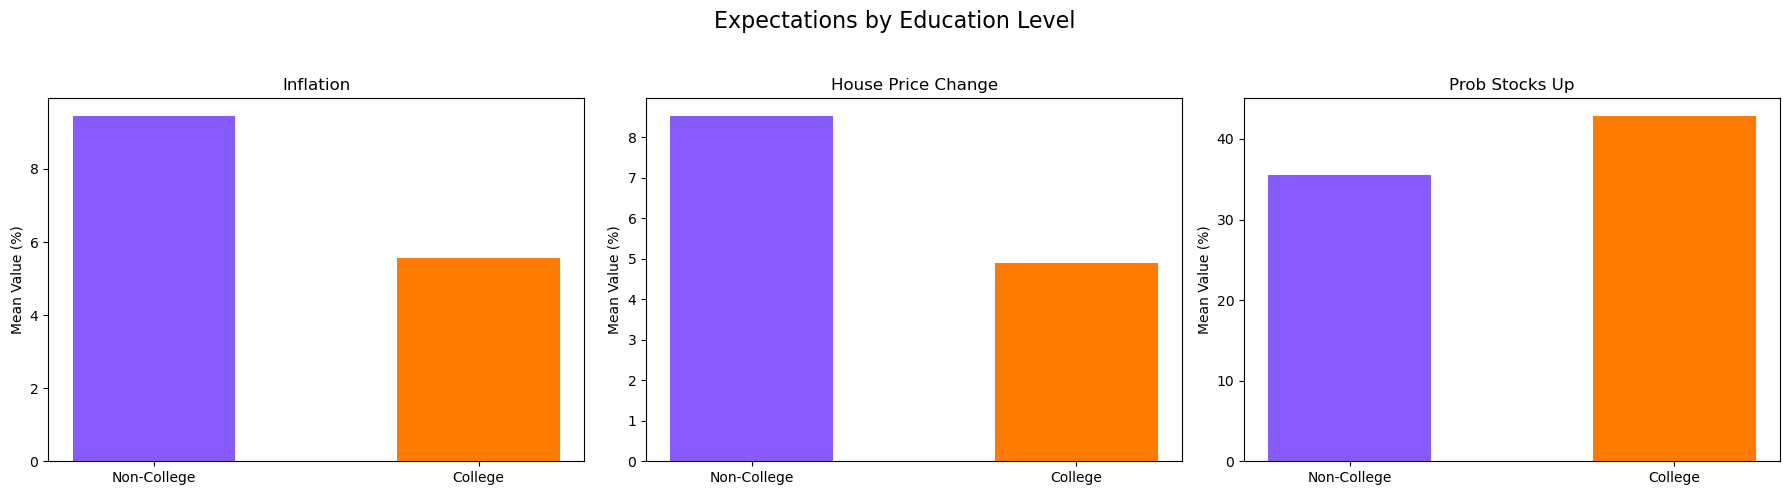

In [17]:
# 3.2.1–3.2.2
education_means = summarize_and_plot(
    df=merged_df,
    group_col="college",
    mapping_dict={0: "Non-College", 1: "College"},
    expectation_vars=expectation_vars,
    colors={"Non-College": "#875AFB", "College": "#FF7A00"},
    title="Expectations by Education Level",
    index_name="Education",
)

Average expectations by numeracy in percentage:


,inflation,house_price_change,prob_stocks_up
Numeracy,,,
Low,8.92,7.78,36.27
High,4.51,4.04,45.06


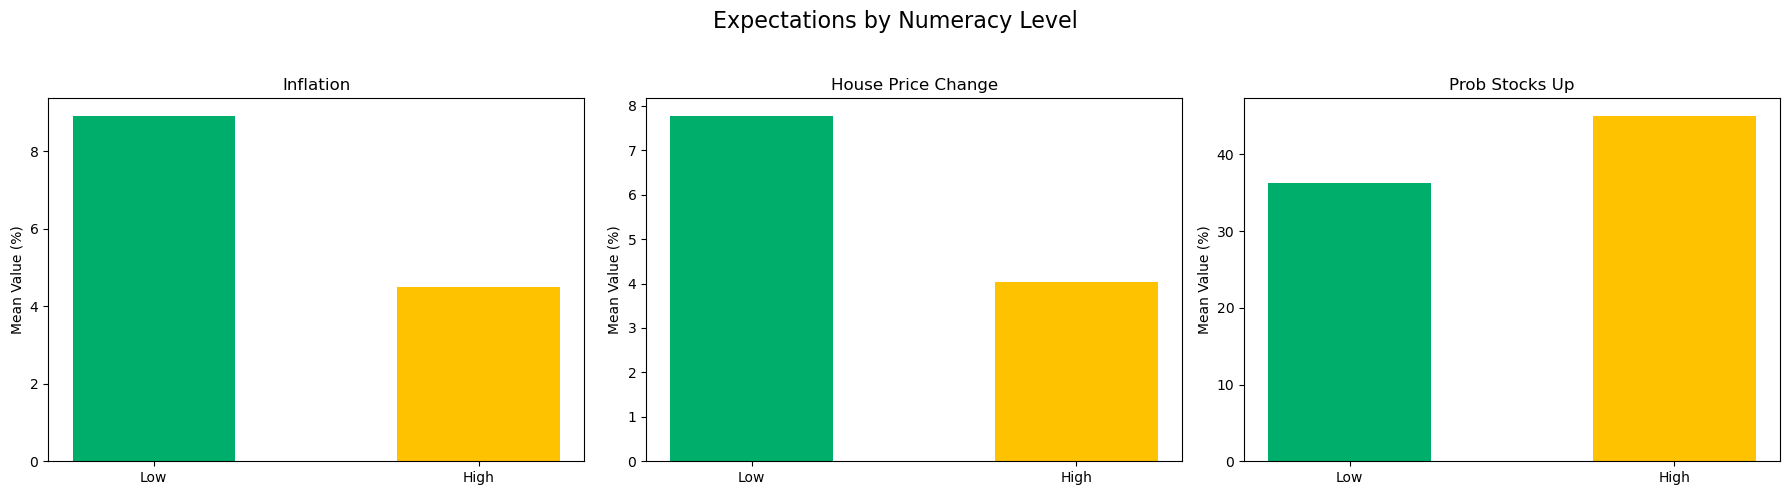

In [18]:
# 3.3.1–3.3.2
numeracy_means = summarize_and_plot(
    df=merged_df,
    group_col="num_lit_high",
    mapping_dict={0: "Low", 1: "High"},
    expectation_vars=expectation_vars,
    colors={"Low": "#00AE6b", "High": "#FFC200"},
    title="Expectations by Numeracy Level",
    index_name="Numeracy",
)

# Part 4


In [19]:
# 4.1 create monthly mean dataframe
merged_df_M_mean = (
    merged_df.set_index("date")
    .groupby(["female", "college", "num_lit_high"])[
        ["inflation", "house_price_change", "prob_stocks_up"]
    ]
    .resample("ME")
    .mean()
    .reset_index()
)

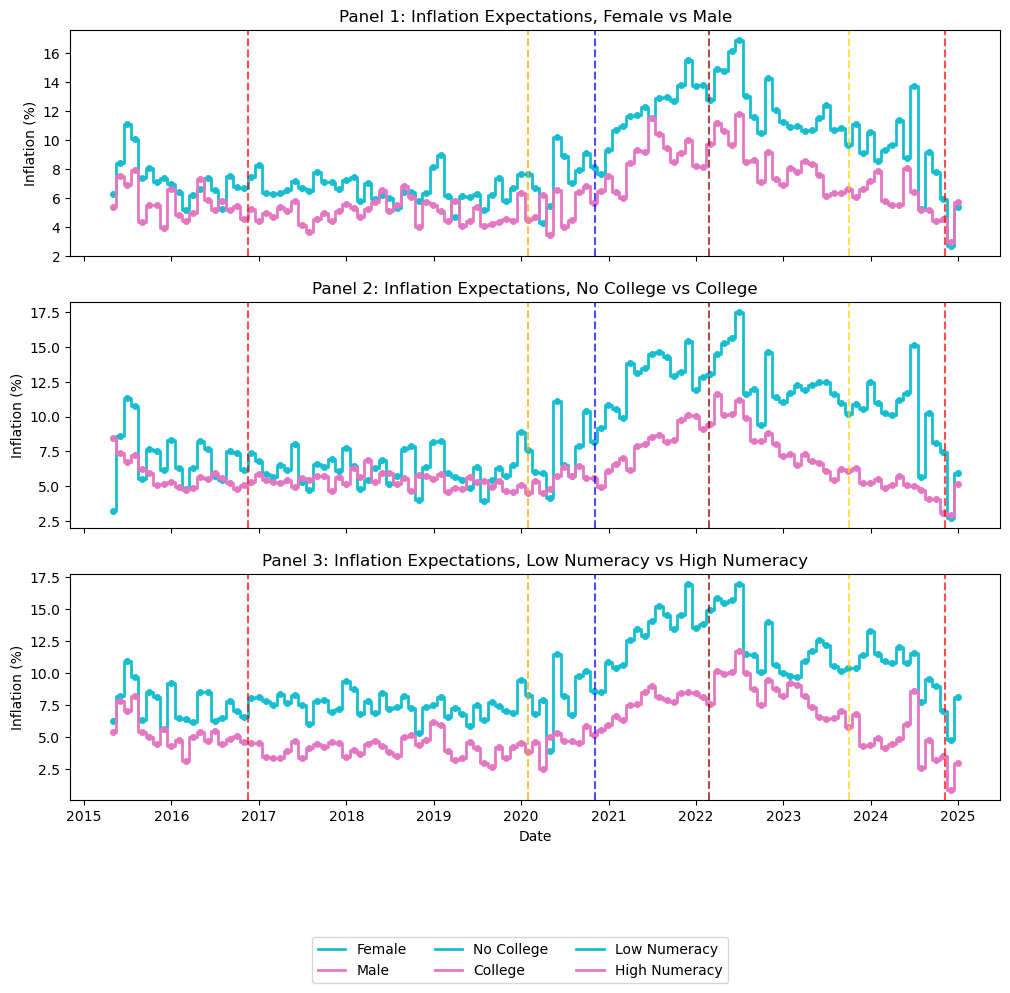

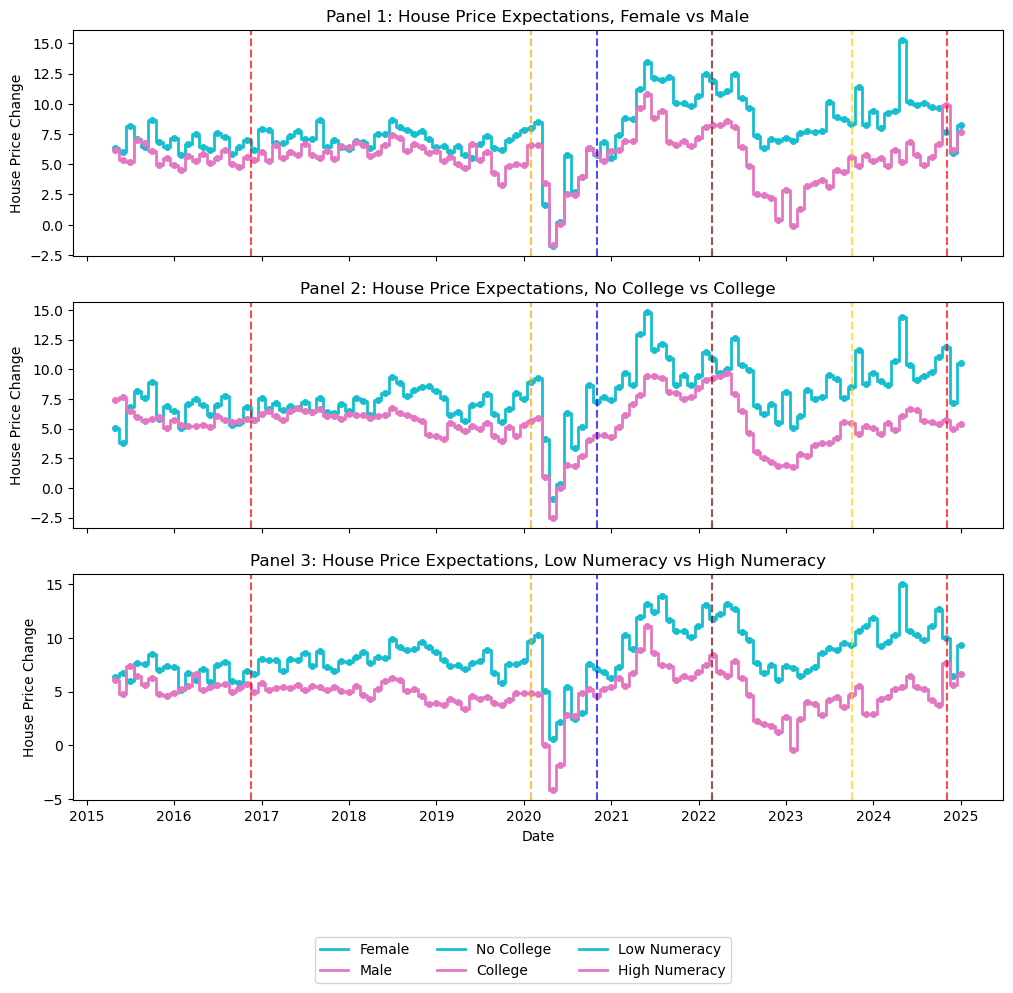

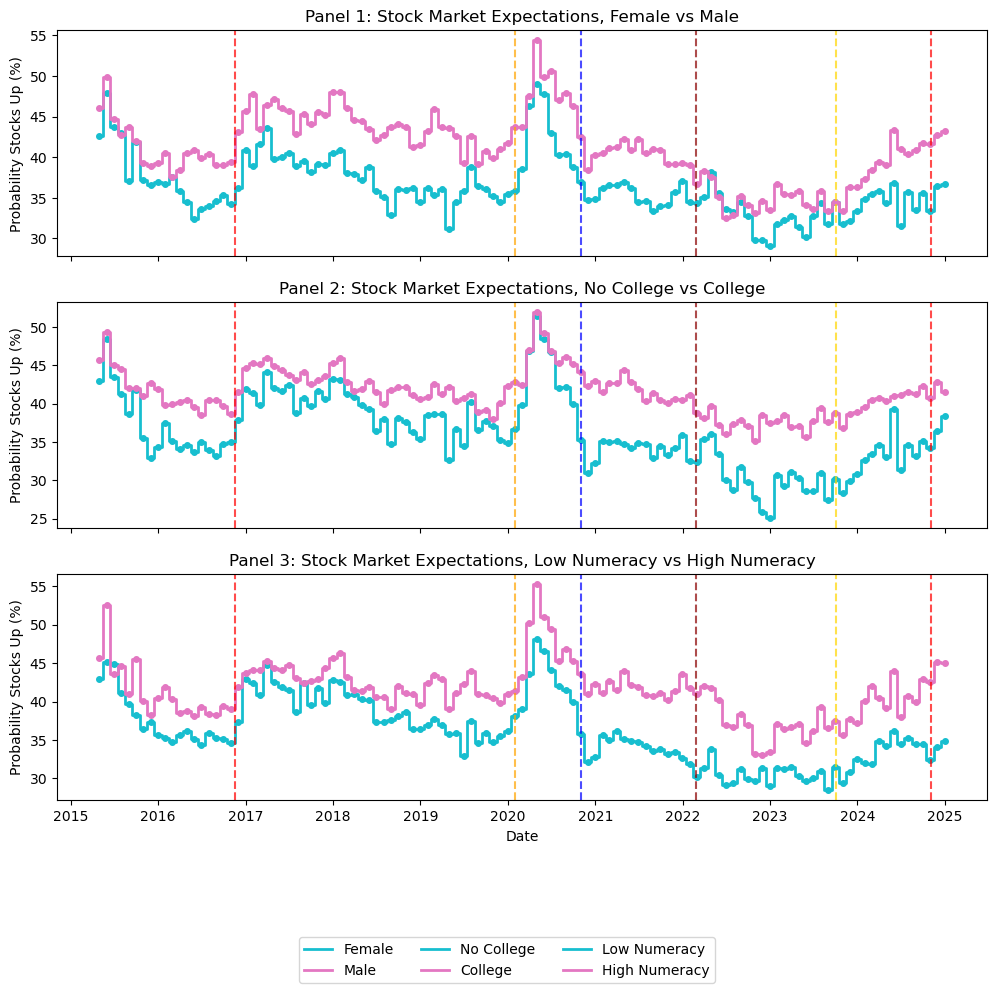

In [ ]:
# 4.2 and 4.3

# Ensure 'date' is datetime
merged_df_M_mean["date"] = pd.to_datetime(merged_df_M_mean["date"])

# Prepare subsets and resample to monthly averages (fill missing months) 
subsets = {
    "Female": merged_df_M_mean[merged_df_M_mean["female"] == 1],
    "Male": merged_df_M_mean[merged_df_M_mean["female"] == 0],
    "No College": merged_df_M_mean[merged_df_M_mean["college"] == 0],
    "College": merged_df_M_mean[merged_df_M_mean["college"] == 1],
    "Low Numeracy": merged_df_M_mean[merged_df_M_mean["num_lit_high"] == 0],
    "High Numeracy": merged_df_M_mean[merged_df_M_mean["num_lit_high"] == 1],
}

for key in subsets:
    subsets[key] = (
        subsets[key]
        .set_index("date")
        .resample("ME")  # monthly resample
        .mean()
        .reset_index()
        .sort_values("date")
    )

# Variables to plot
variables_info = [
    ("Inflation Expectations", "inflation", "Inflation (%)"),
    ("House Price Expectations", "house_price_change", "House Price Change"),
    ("Stock Market Expectations", "prob_stocks_up", "Probability Stocks Up (%)"),
]

# Events to annotate
events = [
    ("2016-11-18", "Trump 1st Election", "red"),
    ("2020-02-01", "Covid-19 goes global", "orange"),
    ("2020-11-03", "Biden's Election", "blue"),
    ("2022-02-24", "Russia invades Ukraine", "darkred"),
    ("2023-10-03", "Nobel Prize awarded to Jon Fosse", "gold"),
    ("2024-11-05", "Trump 2nd Election", "red"),
]

# Panels configuration
panels = [
    ("Panel 1", ["Female", "Male"]),
    ("Panel 2", ["No College", "College"]),
    ("Panel 3", ["Low Numeracy", "High Numeracy"]),
]

colors = ["#17BECF", "#E377C2"]


# Helper to add events
def add_events(ax, events):
    for date_str, label, color in events:
        ax.axvline(pd.Timestamp(date_str), color=color, linestyle="--", alpha=0.7)


# Plotting
for title, var, ylabel in variables_info:
    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    for ax, (panel_title, group_keys) in zip(axes, panels):
        for key, color in zip(group_keys, colors):
            # Step plot with markers preserves monthly averages visually
            ax.step(
                subsets[key]["date"],
                subsets[key][var],
                where="mid",
                color=color,
                label=key,
                linewidth=2,
            )
            ax.plot(
                subsets[key]["date"], subsets[key][var], "o", color=color, markersize=4
            )

        # 🔹 Enhanced title showing which groups are compared
        comparison = f"{group_keys[0]} vs {group_keys[1]}"
        ax.set_title(f"{panel_title}: {title}, {comparison}")
        ax.set_ylabel(ylabel)
        add_events(ax, events)

    axes[2].set_xlabel("Date")

    # Collect handles for single legend
    handles, labels = [], []
    for ax in axes:
        for h, l in zip(*ax.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)
    fig.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.02),
        ncol=3,
        fontsize=10,
    )

## Own anylysis

The events with sizeable effects on expectations were Covid-19 going global (Feb 2020), Trump’s first election (Nov 2016), and Russia’s invasion of Ukraine (Feb 2022). Other slightly smaller events like the Nobel Prize had little effect.

One can see differences across groups: high-numeracy and college-educated people reacted more quickly and strongly, while low-numeracy or non-college groups adjusted more slowly. Gender differences were smaller but sometimes women adjusted slightly less than men.


# Part 5

In [21]:
# 5.1.1
# Read the monthly CPI data
cpi = pd.read_csv("data/CPI.csv")

# Make sure the DATE column is in datetime format and ordered correctly
cpi["DATE"] = pd.to_datetime(cpi["DATE"])
cpi = cpi.sort_values("DATE").reset_index(drop=True)

# Compute realized forward-looking (next-12-month) inflation
cpi["inflation_forward"] = (cpi["CPI"].shift(-12) - cpi["CPI"]) / cpi["CPI"] * 100

# Display the first 12 rows to verify
print(cpi[["DATE", "CPI", "inflation_forward"]].head(12))

         DATE   CPI  inflation_forward
0  1947-01-01  21.5          10.232558
1  1947-02-01  21.6           9.722222
2  1947-03-01  22.0           6.818182
3  1947-04-01  22.0           8.181818
4  1947-05-01  22.0           9.090909
5  1947-06-01  22.1           9.502262
6  1947-07-01  22.2           9.909910
7  1947-08-01  22.4           8.928571
8  1947-09-01  22.8           7.017544
9  1947-10-01  22.9           6.113537
10 1947-11-01  23.1           4.761905
11 1947-12-01  23.4           2.564103


In [22]:
# 5.1.2
cpi["month"] = cpi["DATE"].dt.to_period("M").dt.to_timestamp()
cpi = cpi[["month", "inflation_forward"]]
sce = merged_df_M_mean.copy()
sce["month"] = pd.to_datetime(sce["date"]).dt.to_period("M").dt.to_timestamp()
merged_final = pd.merge(sce, cpi, on="month", how="left")

print(merged_final[["month", "female", "inflation", "inflation_forward"]].head())

       month  female  inflation  inflation_forward
0 2015-04-01     0.0   1.571429           1.185436
1 2015-05-01     0.0   0.750000           1.097046
2 2015-06-01     0.0   6.812500           1.051746
3 2015-07-01     0.0  11.346154           0.882353
4 2015-08-01     0.0   2.117647           1.050420


In [ ]:
# For 5.1.3
#  helper function 
def plot_gender_comparison(df, x_col, y_col, title_suffix, colors, fig_size=(18, 5)):
    """
    Plots male vs female inflation relationships and prints correlation coefficients.
    """
    # Split data
    male_df = df[df["female"] == 0]
    female_df = df[df["female"] == 1]

    # Prepare values
    xvalues_male = male_df[x_col]
    yvalues_male = male_df[y_col]
    xvalues_female = female_df[x_col]
    yvalues_female = female_df[y_col]

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=fig_size)

    # Plot males
    axes[0].scatter(xvalues_male, yvalues_male, color=colors[0], alpha=0.5)
    axes[0].set_title(f"Male Inflation Expectations vs Realized {title_suffix}")
    axes[0].set_xlabel("Inflation Expectations (%)")
    axes[0].set_ylabel(f"Realized {title_suffix} Inflation (%)")

    # Plot females
    axes[1].scatter(xvalues_female, yvalues_female, color=colors[1], alpha=0.5)
    axes[1].set_title(f"Female Inflation Expectations vs Realized {title_suffix}")
    axes[1].set_xlabel("Inflation Expectations (%)")
    axes[1].set_ylabel(f"Realized {title_suffix} Inflation (%)")

    # Compute and annotate correlations
    corr_male = xvalues_male.corr(yvalues_male)
    corr_female = xvalues_female.corr(yvalues_female)
    print(f"Correlation coefficient (male): {corr_male}")
    print(f"Correlation coefficient (female): {corr_female}")

    axes[0].annotate(
        f"Corr: {corr_male:.2f}",
        xy=(0.05, 0.95),
        xycoords="axes fraction",
        fontsize=12,
        ha="left",
        va="top",
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5),
    )
    axes[1].annotate(
        f"Corr: {corr_female:.2f}",
        xy=(0.05, 0.95),
        xycoords="axes fraction",
        fontsize=12,
        ha="left",
        va="top",
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5),
    )

    plt.show()
    return (corr_male, corr_female)

Correlation coefficient (male): 0.3369481989647096
Correlation coefficient (female): 0.3609371792751104


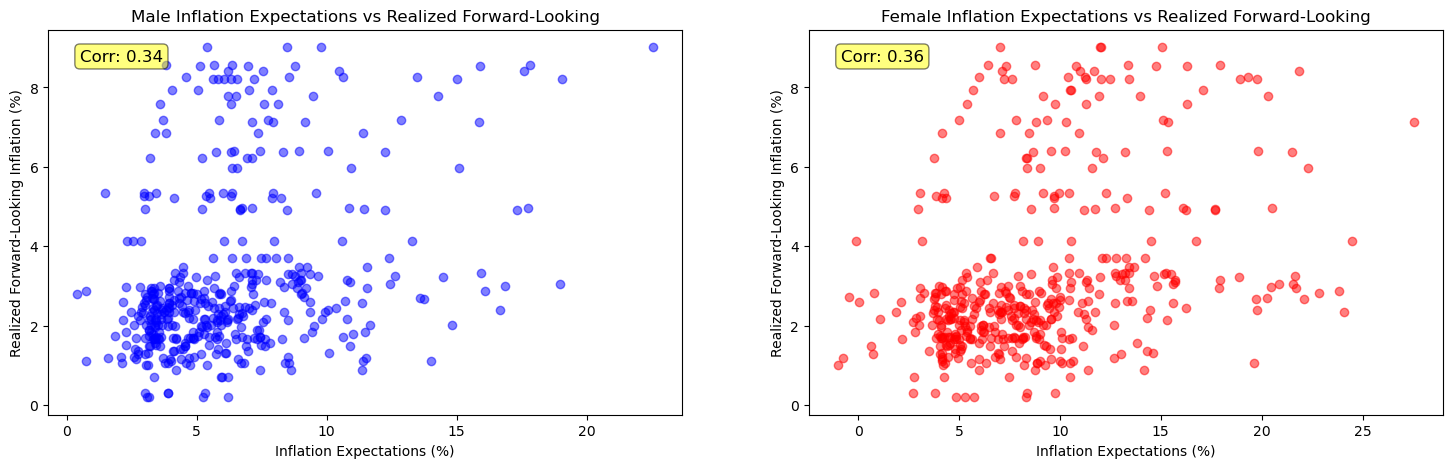

In [24]:
# 5.1.3
new_male_df = merged_final[merged_final["female"] == 0]
new_female_df = merged_final[merged_final["female"] == 1]

yvalues1 = new_male_df["inflation_forward"]
xvalues1 = new_male_df["inflation"]
yvalues2 = new_female_df["inflation_forward"]
xvalues2 = new_female_df["inflation"]

corr_male, corr_female = plot_gender_comparison(
    merged_final,
    x_col="inflation",
    y_col="inflation_forward",
    title_suffix="Forward-Looking",
    colors=("blue", "red"),
)

In [25]:
# 5.2.1
# Read the monthly CPI data anew
cpi2 = pd.read_csv("data/CPI.csv")

# Make sure the DATE column is in datetime format and ordered correctly
cpi2["DATE"] = pd.to_datetime(cpi2["DATE"])
cpi2 = cpi2.sort_values("DATE").reset_index(drop=True)

# Compute realized forward-looking (next-12-month) inflation
cpi2["inflation_backward"] = (
    (cpi2["CPI"] - cpi2["CPI"].shift(12)) / cpi2["CPI"].shift(12) * 100
)


# # Display the last 12 rows to verify
print(cpi2[["DATE", "CPI", "inflation_backward"]].tail(12))

          DATE    CPI  inflation_backward
932 2024-09-01  314.9            2.439818
933 2024-10-01  315.6            2.567436
934 2024-11-01  316.4            2.693931
935 2024-12-01  317.6            2.883058
936 2025-01-01  319.1            3.001937
937 2025-02-01  319.8            2.829582
938 2025-03-01  319.6            2.403076
939 2025-04-01  320.3            2.332268
940 2025-05-01  320.6            2.395401
941 2025-06-01  321.5            2.682849
942 2025-07-01  322.1            2.710459
943 2025-08-01  323.4            2.960840


In [26]:
# 5.2.2
cpi2["month"] = cpi2["DATE"].dt.to_period("M").dt.to_timestamp()
cpi2 = cpi2[["month", "inflation_backward"]]
sce2 = merged_df_M_mean.copy()
sce2["month"] = pd.to_datetime(sce2["date"]).dt.to_period("M").dt.to_timestamp()
merged_final2 = pd.merge(sce2, cpi2, on="month", how="left")

print(merged_final2[["month", "female", "inflation", "inflation_backward"]].head())

       month  female  inflation  inflation_backward
0 2015-04-01     0.0   1.571429           -0.126850
1 2015-05-01     0.0   0.750000            0.042212
2 2015-06-01     0.0   6.812500            0.210793
3 2015-07-01     0.0  11.346154            0.210526
4 2015-08-01     0.0   2.117647            0.210526


Correlation coefficient (male): 0.4125529096370011
Correlation coefficient (female): 0.45643708750118467


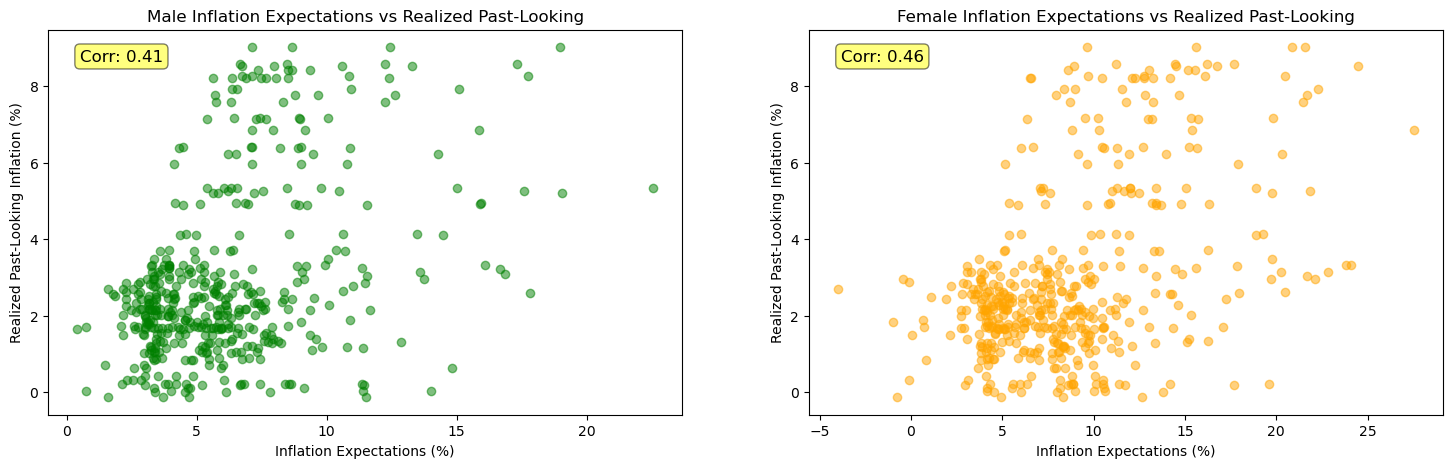

In [27]:
# 5.2.3
new_male_df2 = merged_final2[merged_final2["female"] == 0]
new_female_df2 = merged_final2[merged_final2["female"] == 1]

yvalues1_2 = new_male_df2["inflation_backward"]
xvalues1_2 = new_male_df2["inflation"]
yvalues2_2 = new_female_df2["inflation_backward"]
xvalues2_2 = new_female_df2["inflation"]

corr_male2, corr_female2 = plot_gender_comparison(
    merged_final2,
    x_col="inflation",
    y_col="inflation_backward",
    title_suffix="Past-Looking",
    colors=("green", "orange"),
)

# Part 5 Coefficient analysis
Both men and women’s expectations of future inflation are more closely related to past inflation than to other factors. This means people tend to base their beliefs on what they have seen happen recently. Women’s expectations are slightly more closely tied to past inflation than men’s, but the difference is small. Overall, there are no major gender differences, and backward-looking behavior seems stronger than forward-looking.

# AI Usage

Before any usage of chatgpt or any code writing ai, we first tried to write and debug all the code on our own, but when we ran into issues we couldn’t figure out like syntax errors, debugging certain cells, or dealing with ValueErrors, we used ai for some assistance. The AI mainly helped us troubleshoot problems and clean up the code once we’d already made our own attempts.